# Exercise 06: Thermal Noise
\- Gugliemo Grillo

<div><table>
  <tr>
    <td><img src="https://i.ibb.co/kHY7J0v/Thermal-noise-1.png"></td>
    <td><img src="https://i.ibb.co/s1vSn9K/Thermal-noise-2.png"/></td>
  </tr>
</table></div>

In [122]:
# packages used
import scipy.constants
from scipy.integrate import quad
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display, Math

### Exercise 05.01 Resonant Gravitational Wave Detector - AURIGA
<img style="width: 50%;" src="https://i.ibb.co/kHY7J0v/Thermal-noise-1.png" />

The box in the lower left represent a viscous damping. The characteristic equation is:

$$ m \ddot{x}(t) = F(t) - \beta \dot{x}(t) -k x(t) \longrightarrow m(i \omega)^2 x(\omega) = F(\omega) - \beta i \omega x(\omega) - k x(\omega)$$ 

$$ H(\omega) = \frac{x(\omega)}{F(\omega)} = \frac{1/m}{\omega_0 ^2 - \omega ^2 + i \omega / \tau} = \frac{1}{m \omega_0 ^2}\frac{1}{1 - \bigl(\frac{\omega}{\omega_0}\bigr) ^2 + i \omega / Q} $$

Where $\omega_0 ^2 = k/m = 2 \pi f_0$, $\tau = m/ \beta$ and $Q=\tau \omega_0$.

In [123]:
# Given constans for Exercise 05.01
m = 1.3e3 # kg
F0 = 990 # Hz
Q = 1e6
T = 2 #K
kb = scipy.constants.Boltzmann

# Constant redefinition
Omega0 = 2*np.pi*F0
TAU = Q/omega0
BETA = m/TAU

display(Math(r'\omega_0 = {:.5e} Hz'.format(Omega0)))
display(Math(r'\tau = {:.5e} s'.format(TAU)))
display(Math(r'\beta = {:.5e}\ kg\cdot Hz'.format(BETA)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming a Brownian noise at input with PSD $S_{F,F}(\omega) = 2 \beta k_b T$ where the $\beta$ is the same as in the viscous dumping as explained during \textit{Lecture 17}. The output PSD can be evaluated as $S_{x, x}(\omega) = |H(\omega)|^2 S_{F,F}(\omega)$:

$$ S_{x, x}(\omega) = \frac{k_b T}{m \omega_0 ^3}\frac{2/Q}{(1 - x ^2)^2 + x^2 / Q^2}$$

where the change of variable $x=\omega / \omega_0$ was performed. The autocorrelation is just the inverse  Fourier transform of the PSD:

$$ R_{x, x}(t) = \mathcal{FT}^{-1}\bigl[ S_{x, x}(\omega) \bigr](t) $$

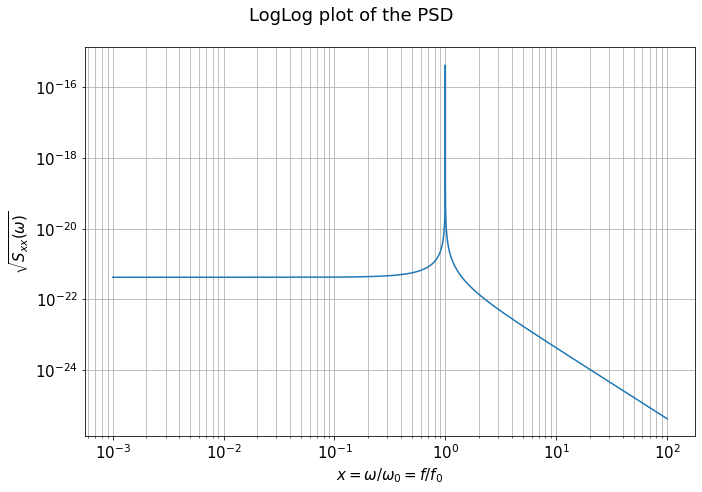

In [124]:
Sxx = lambda x : kb*T/(m* Omega0**3 )*(2/Q)/( (1-x**2)**2 + x**2 / Q**2)

x = np.linspace(1e-3, 1e2, int(1e5))

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(1,1, figsize=(10, 7))
fig.suptitle('LogLog plot of the PSD')

axis.plot(x, np.sqrt(Sxx(x)) )
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_xlabel(r"$x=\omega / \omega_0 = f/f_0$")
axis.set_ylabel(r"$\sqrt{S_{xx}(\omega)}$")
axis.grid(True, which="both")

fig.tight_layout()

In order to check whether the equipartition holds, we proceed to evaluate the random mean square fluctuations:

$$ <x^2> = \mathcal{FT}^{-1}\bigl[S_{x, x}(\omega)\bigr](t=0) = \frac{k_b T}{m \omega_0 ^2}\frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{2/Q}{(1 - x ^2)^2 + x^2 / Q^2} dx$$

The value of the integral can be evaluated numerically:

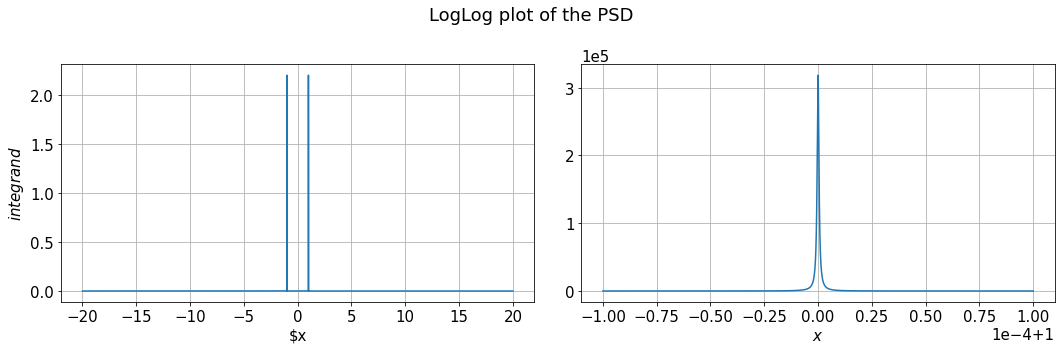

<IPython.core.display.Math object>

In [125]:
def integrand(x):
    return 1/(Q*np.pi)*1/( (1-x**2)**2 + (x**2 / Q**2))

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('LogLog plot of the PSD')

x = np.linspace(-20, 20, int(1e5))
axis[0].plot(x, integrand(x) )
axis[0].set_xlabel(r"$x")
axis[0].set_ylabel(r"$integrand$")
axis[0].grid(True, which="both")

plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0)) 
x = np.linspace(0.9999, 1.0001, int(1e5))
axis[1].plot(x, integrand(x) )
axis[1].set_xlabel(r"$x$")
axis[1].grid(True, which="both")

fig.tight_layout()
plt.show()

I = quad(integrand, 0.99995, 1.00005)

display(Math(r'I = {:.3e} (\pm {:.3e}) \simeq 0.5'.format(I[0], I[1])))

From the two graph it's possible to see that all the contribute is given at resonance $x\simeq \pm 1$. As the function is even it is possible to evaluate the integral only in a neighborhood of $+1$ and double the result. The final value of the integral is therefore $1$ and the value of the RMS is:
$$ <x^2> = \mathcal{FT}^{-1}\bigl[S_{x, x}(\omega)\bigr](t=0) = \frac{k_b T}{m \omega_0 ^2}\frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{2/Q}{(1 - x ^2)^2 + x^2 / Q^2} dx = \frac{k_b T}{m \omega_0 ^2}$$

The equipartition theorem states that the energy of the energy of an harmonic oscillator is:
$$\frac{1}{2} k_b T = \frac{1}{2} k <x^2>$$

Which is exactly the same relation found for the RMS after substituting $\omega_0 ^2 = k/m$.

---

### Exercise 05.02 Circuit
<img style="width: 50%;" src="https://i.ibb.co/s1vSn9K/Thermal-noise-2.png" />

In [127]:
# 19:03
# Given constans for Exercise 05.02
L = 1e-3 # H
C = 0.25e-6 # F
R = 50e6 # Ohm
T = 293 # K

# Constant redefintion

display(Math(r'k = {:.5e} N/m'.format(k)))
display(Math(r'\Delta f = {:.5e} Hz'.format(DeltaF)))
display(Math(r'\beta = {:.5e} Ns/m'.format(BETA)))

NameError: name 'k' is not defined

---

In [ ]:
def h_T(omega):
    return 1/(1j*omega*C0 + KAPPA + 2*Vbias/Rfb)

def h_V(omega):
    return I0*RHO/(1j*omega*C0 + KAPPA + 2*Vbias/Rfb)

w = np.linspace(int(1e2), int(1e7), int(1e6))

points_h_T = h_T(w)
mag = np.abs(points_h_T)
phase = np.arctan(np.imag(points_h_T) / np.real(points_h_T))*180/np.pi

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('Bode plot for the Frequency responses')

axis[0][0].plot(w, mag)
axis[0][0].set_xscale('log')
axis[0][0].set_yscale('log')
axis[0][0].set_xlabel("Angular frequency $\omega$ [1/s]")
axis[0][0].set_ylabel("Module |$h_{\delta T'}(\omega$)|")
axis[0][0].grid(True, which="both")

axis[0][1].plot(w, phase)
axis[0][1].set_xscale('log')
axis[0][1].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[0][1].set_ylabel(r"Phase [deg]")
axis[0][1].grid(True, which="both")


points_h_V = h_V(w)
mag = np.abs(points_h_V)
phase = np.arctan(np.imag(points_h_V) / np.real(points_h_V))*180/np.pi

axis[1][0].plot(w, mag)
axis[1][0].set_xscale('log')
axis[1][0].set_yscale('log')
axis[1][0].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[1][0].set_ylabel(r"Module |$h_{\delta V}(\omega$)|")
axis[1][0].grid(True, which="both")

axis[1][1].plot(w, phase)
axis[1][1].set_xscale('log')
axis[1][1].set_xlabel(r"Angular frequency $\omega$ [1/s]")
axis[1][1].set_ylabel(r"Phase [deg]")
axis[1][1].grid(True, which="both")



plt.tight_layout()
plt.show()

In [ ]:
def h_T(t):
    return np.exp(-(KAPPA/C0 + 2*Vbias/Rfb)*t)/(2*np.pi*C0)

def h_V(t):
    return I0*RHO/(2*np.pi*C0)*np.exp(-(KAPPA/C0 + 2*Vbias/Rfb)*t)

t = np.linspace(0, 0.5, int(1e6))

# Bode plot
plt.rcParams.update({'font.size': 10})
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log-Plot for the impulse and frequency responses')

axis[0].plot(t, h_T(t=t))
axis[0].set_yscale('log')
axis[0].set_xlabel("Time $t$ [s]")
axis[0].set_ylabel("Log-Impulse response $Log(h_{\delta T'}(t))$")
axis[0].grid(True, which="both")


axis[1].plot(t, h_V(t=t))
axis[1].set_yscale('log')
axis[1].set_xlabel("Time $t$ [s]")
axis[1].set_ylabel("Log-Impulse response $Log(h_{\delta V}(t))$")
axis[1].grid(True, which="both")


plt.tight_layout()
plt.show()